## Friday 8

files needed = broadband_size.xlsx, auto_data.dta

This week we are working on


1. Scatter plots
2. Seaborn's facet plots
3. Multi-index

In [1]:
import pandas as pd     
import matplotlib.pyplot as plt   
from pandas_datareader import data, wb    
import datetime as dt
import seaborn as sns

%matplotlib inline      

In [ ]:
#!pip install pandas_datareader

## Pandas multi-index slicing


In [2]:
d = {'num_legs': [4, 4, 2, 2,2],
     'num_wings': [0, 0, 2, 2,2],
     'class': ['mammal', 'mammal', 'mammal', 'bird','bird'],
     'animal': ['cat', 'dog', 'bat', 'penguin','ostrich'],
     'locomotion': ['walks', 'walks', 'flies', 'walks','walks']}
df = pd.DataFrame(data=d)
df = df.set_index(['class', 'animal', 'locomotion'])
df

num_legs  num_wings
class  animal  locomotion                     
mammal cat     walks              4          0
       dog     walks              4          0
       bat     flies              2          2
bird   penguin walks              2          2
       ostrich walks              2          2

In [7]:
# .xs() is for a cross-section of data
# note that it keeps my innermost index level
df.xs(('mammal', 'dog'))

/var/folders/59/h6mpwd8s71n4m11hd0jkp45h0000gn/T/ipykernel_57896/1172425581.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.xs(('mammal', 'dog'))


,num_legs,num_wings
locomotion,,
walks,4,0


In [5]:
df.loc[(['mammal'],['dog']),:] 

,,,num_legs,num_wings
class,animal,locomotion,,
mammal,dog,walks,4,0


In [6]:
# The tuple () style tells Pandas you're using index levels; list [] style is not
df.loc[(['mammal','bird'],['cat','bat']),:] # this takes a slice across multiple levels

num_legs  num_wings
class  animal locomotion                     
mammal cat    walks              4          0
       bat    flies              2          2

In [8]:
df.xs('bat', level = 1)

,,num_legs,num_wings
class,locomotion,,
mammal,flies,2,2


In [9]:
df.xs(('bird','ostrich'))['num_legs'][0]

/var/folders/59/h6mpwd8s71n4m11hd0jkp45h0000gn/T/ipykernel_57896/795053957.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.xs(('bird','ostrich'))['num_legs'][0]


2

Other assistance:

* [Other methods that may work](https://stackoverflow.com/questions/33194016/python-pandas-slice-multiindex-by-second-level-index-or-any-other-level)

* [Conditionals with multi-index](https://stackoverflow.com/questions/50608749/slicing-a-multiindex-dataframe-with-a-condition-based-on-the-index)

## Scatter plots

Scatter plots are used to compare two variables. This is a good approach for visualizing the correlation of two variables. Let's get some data from FRED.

In [17]:
# These codes are for  real gdp and the unemployment rate in the United States. 
codes = ['GDPC1', 'UNRATE']  

start = dt.datetime(1970, 1, 1)
fred = data.DataReader(codes, 'fred', start)

fred.head()

,GDPC1,UNRATE
DATE,,
1970-01-01,5300.652,3.9
1970-02-01,NaN,4.2
1970-03-01,NaN,4.4
1970-04-01,5308.164,4.6
1970-05-01,NaN,4.8


Gremlins! The gdp data is quarterly, but the unemployment rate is monthly. Let's fix this by downsampling to quarterly frequency. The FRED datareader is really good &mdash; the index is already a datetime object. (How would you check?)

In [25]:
# Create an average quarterly unemployment rate.
fred_q=fred.resample('q').mean()                
fred_q.head()

,GDPC1,UNRATE
DATE,,
1970-03-31,5300.652,4.166667
1970-06-30,5308.164,4.766667
1970-09-30,5357.077,5.166667
1970-12-31,5299.672,5.833333
1971-03-31,5443.619,5.933333


Let's plot the growth rate of GDP against the change in the unemployment rate. The relationship between these two variables is known as [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law). 

Since the unemployment rates are already rates, it makes more sense to just difference them than to compute growth rates.

Example: $u_t$=1.25\% and $u_{t-1}$=0.75\%. 
It is clearer to say that the unemployment rate rose by 0.5 percentage points than to say that it rose by 67\%. 


In [26]:
# Compute the growth rate of gdp. 
fred_q['gdp_gr'] = fred_q['GDPC1'].pct_change()*100        

# .difference() takes the first difference: u(t)-u(t-1).   
fred_q['unemp_dif'] = fred_q['UNRATE'].diff()              
fred_q.head()

,GDPC1,UNRATE,gdp_gr,unemp_dif
DATE,,,,
1970-03-31,5300.652,4.166667,NaN,NaN
1970-06-30,5308.164,4.766667,0.141718,0.600000
1970-09-30,5357.077,5.166667,0.921467,0.400000
1970-12-31,5299.672,5.833333,-1.071573,0.666667
1971-03-31,5443.619,5.933333,2.716149,0.100000


We are ready to plot. The `ax.scatter()` method ([docs](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html)) takes two pieces of data: the x variable and the y variable. 

```python
ax.scatter(x, y)
```

In our example, the x variable is the gdp growth rate and the y variable is the change in the unemployment rate. 

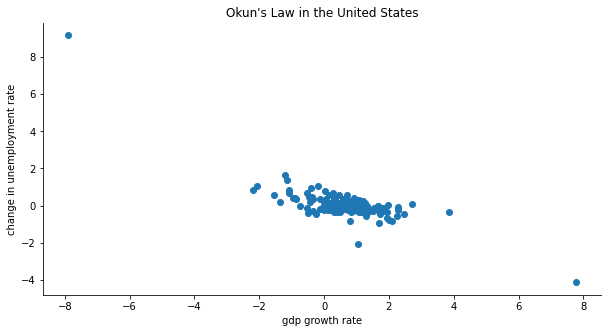

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
                       
ax.scatter(fred_q['gdp_gr'], fred_q['unemp_dif'])

ax.set_title('Okun\'s Law in the United States' )
ax.set_ylabel('change in unemployment rate')
ax.set_xlabel('gdp growth rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


Clearly, there is a negative correlation here: Low gdp growth rates are associated with positive changes in the unemployment rate. When gdp is growing slowly (or falling) unemployment is rising. 

## Practice: Scatters

Let's explore some of scatter plot's options. Use the [documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html) for help.  

Modify the Okun's Law figure we just made. 

1. Change the color of the dots to red.
2. Change the edgecolor of the markers to black. (markers have edges and faces)
3. Use the `s` option to set the size of the markers (in points squared) to 70.


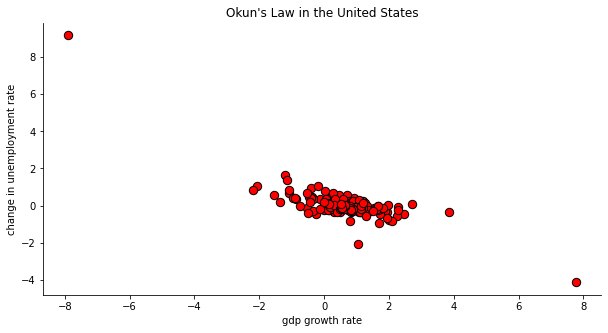

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
                       
ax.scatter(fred_q['gdp_gr'], fred_q['unemp_dif'], s = 70, c = "red", edgecolor = "black")

ax.set_title('Okun\'s Law in the United States' )
ax.set_ylabel('change in unemployment rate')
ax.set_xlabel('gdp growth rate')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


Check out the documentation for [marker styles](https://matplotlib.org/api/markers_api.html). These styles can be used with `.plot()` command, too. 

3. Change the marker to a triangle. 
4. Use `text()` or `annotate()` to label the point corresponding to third quarter 2009: '2009Q3'

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

# your code here

Scatter plots are very useful and we can do a lot more with them. Places to go from here.

1. Add a line of best fit. A bit clunky in matplotlib (use np's polyfit command), but not too bad. The seaborn package has a regplot command that makes this dead simple. 
2. Make data markers different colors or sizes depending on the value of a third variable. For example, you could get some more data and color the markers for years with a repbulican president red and markers for years with democratic presidents blue. 
3. Other ideas?


The OECD has a project studying [broadband internet coverage](http://www.oecd.org/sti/broadband/broadband-statistics/) across countries. It tracks data on numbers of subscribers, speed, and prices. 

1. Load 'broadband_size.xlsx'. It contains data on broadband accounts per 100 people, GDP per capita, and population (in thousands) for several countries. Are all your variables okay? 
2. Give the columns some reasonable names. 


In [30]:
broad = pd.read_excel('broadband_size.xlsx', thousands=',')
broad.columns = ['cty', 'broad_pen', 'gdp_cap', 'pop']
broad.head()

,cty,broad_pen,gdp_cap,pop
0,Australia,31.796,50588.149492,24451
1,Austria,28.543,52467.527002,8735
2,Belgium,38.588,47941.661165,11429
3,Canada,37.847,46704.892034,36624
4,Chile,16.515,24012.914871,18055


3. Create a `.regplot()` with broadband penetration on the y axis and GDP  per capita on the x axis. Add the 95 percent confidence interval. Make it look nice. 

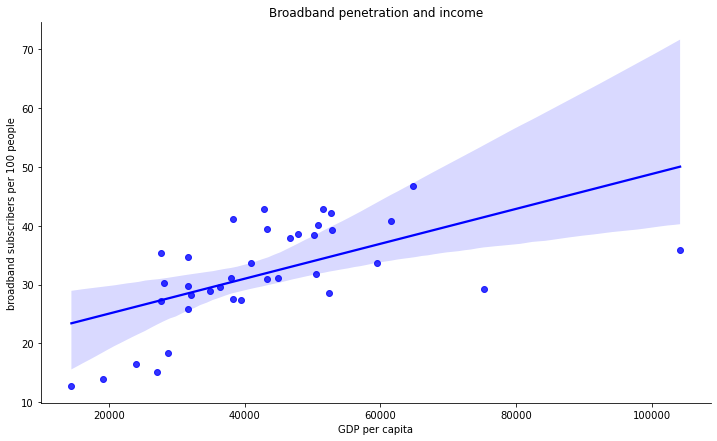

In [31]:
fig, ax = plt.subplots(figsize=(12,7)) 

sns.regplot(x='gdp_cap', y='broad_pen', data=broad,               # the data
            ax = ax,                                              # an axis object
            color = 'blue',                                       # make it blue
            ci = 95)                                              # confidence interval: pass it the percent

sns.despine(ax = ax) 

ax.set_title('Broadband penetration and income')
ax.set_ylabel('broadband subscribers per 100 people')
ax.set_xlabel('GDP per capita')

plt.show()

4. The relationship doesn't look very linear to me. Replot your solution from 3. but try adding the `logx=True` option to regplot to regress y = log(x). As always, consult the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html) if you need help.

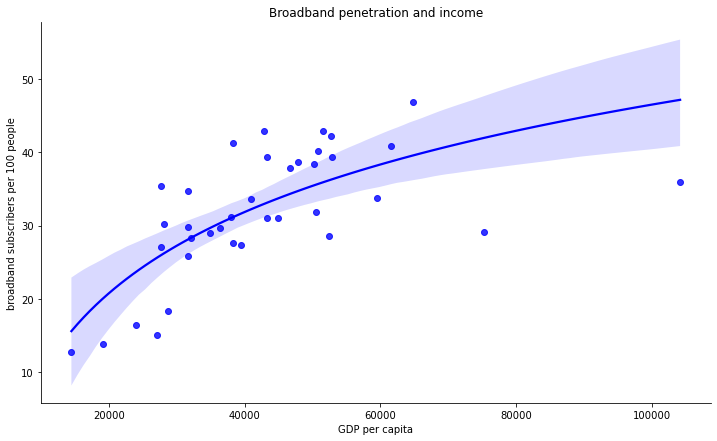

In [32]:
fig, ax = plt.subplots(figsize=(12,7)) 

sns.regplot(x='gdp_cap', y='broad_pen', data=broad,               # the data
            ax = ax, logx = True,                                              # an axis object
            color = 'blue',                                       # make it blue
            ci = 95)                                              # confidence interval: pass it the percent

sns.despine(ax = ax) 

ax.set_title('Broadband penetration and income')
ax.set_ylabel('broadband subscribers per 100 people')
ax.set_xlabel('GDP per capita')

plt.show()

### Bubble plot (and passing keywords)
A bubble plot is a scatter plot in which the size of the data markers (usually a circle) varies with a third variable. 

We can actually make these plots in matplotlib. The syntax is 
```python
ax.plot(x, y, s) 
```
where `s` is the variable corresponding to marker size. Since seaborn is built on top of matplotlib, we can pass *scatter keyword arguments* to `.regplot( )` and these get passed through to the underlying scatter. 

If we pass a single number to `s` it changes the size of all the bubbles. If we pass it a Series of data, then each bubble gets scaled according to its value in the series. 

The syntax for the option is `scatter_kws={'s': data_var}`. This sets the `s` argument of scatter to `data_var`. 

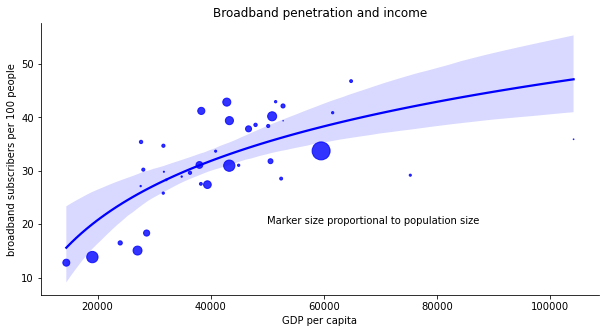

In [33]:
fig, ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='gdp_cap', y='broad_pen', data=broad,    # the data
            ax = ax,                                   # an axis object
            scatter_kws={'s': broad['pop']/1000},      # make the marker proportional to population            
            #scatter_kws={'s': 25},
            color = 'blue',                            # make it blue
            ci = 95,                                   # confidence interval: pass it the percent
            logx = True)                               # semi-log regression
                      
# We need to let the reader know what the bubble sizes represent.
ax.text(50000, 20, 'Marker size proportional to population size')

sns.despine(ax = ax)  
                                   

ax.set_title('Broadband penetration and income')
ax.set_ylabel('broadband subscribers per 100 people')
ax.set_xlabel('GDP per capita')
plt.show()

Notice that I have scaled population by 1000. The issue is that `s` is interpreted as points^2 (points squared) [[docs](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)]. The idea is that the area of the marker increases proportional to the square of the width.  There is a good discussion of it at [stack overflow](https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size).

If you try to use `s` and your whole figure turns the color of your marker, you probably need to scale your measure for `s`. 

Another example of the scatter_kws useage is to customize the scatter colors and alpha.

In [ ]:
fig, ax = plt.subplots(figsize=(10,5)) 

# To keep the call to regplot from getting out of control, I define the scatter keywords dict here.
my_kws={'s': broad['pop']/1000, 'alpha':0.25, 'color':'black'}

sns.regplot(x='gdp_cap', y='broad_pen', data=broad,    # the data
            ax = ax,                                   # an axis object
            scatter_kws = my_kws,                      # pass parameters to scatter
            color = 'blue',                            # make it blue
            ci = 95,                                   # confidence interval: pass it the percent
            logx = True)                               # semi-log regression

# We need to let the reader know what the bubble sizes represent.
ax.text(50000, 20, 'Marker size proportional to population size')                                                         

sns.despine(ax = ax)
                                   

ax.set_title('Broadband penetration and income')
ax.set_ylabel('broadband subscribers per 100 people')
ax.set_xlabel('GDP per capita')
plt.show()

## Facet plots

Facet plots are grids of plots with the same x- and y-axes. Each plot in the grid is a different subset of the sample. Seaborn gives us simple way to make these plots. 

We often use facet plots in initial exploratory analysis. If we do not know what we are looking for, a facet plot is a good way to start "eye-balling" relationships. Once we have some ideas, we can narrow down our focus and use more precise tools. In general, **we do not include large grids of figures in our finished analysis.** They contain too much unnecessary information.

Load the file 'auto_data.dta' which contains data on automobile characteristics in the European market. These data are from [Miravete, Moral, and Thurk](https://www3.nd.edu/~jthurk/Papers/MMT_RAND.pdf).

In [34]:
df = pd.read_stata('auto_data.dta')
df.head(3)

,CODE,ORIG,FIRM_ID,FIRM,BRAND,MODEL,YEAR,PRICE,QUANTITY,HP,LENGTH,WIDTH,SIZE,WEIGHT,FUEL,MPG,FUELPRICE,SEGMENT
0,10102,1,4.0,Fiat,Alfa Romeo,ALFA 164,1995,27.581303,179.0,0.048032,179.133865,69.291336,1.241243,3039.647461,0,40.554237,0.70969,4
1,10103,1,4.0,Fiat,Alfa Romeo,ALFA 145,1995,20.202333,4934.0,0.041019,161.023621,67.322838,1.084057,2511.013184,0,38.559769,0.70969,2
2,10104,1,4.0,Fiat,Alfa Romeo,ALFA 155,1995,23.651426,1017.0,0.048181,174.803146,67.039368,1.171869,2671.585938,0,35.106655,0.70969,3


In [35]:
# Recode the FUEL variable so I can easily understand it.
df['FUEL'] = df['FUEL'].replace({0:'gasoline', 1:'diesel'})
df.sample(5)

,CODE,ORIG,FIRM_ID,FIRM,BRAND,MODEL,YEAR,PRICE,QUANTITY,HP,LENGTH,WIDTH,SIZE,WEIGHT,FUEL,MPG,FUELPRICE,SEGMENT
871,11302,2,9.0,Kia,Kia,CLARUS,1999,19.201532,3252.0,0.042695,184.649612,69.389763,1.281279,2716.960449,gasoline,31.416399,0.84855,3
53,11601,2,10.0,Mazda,Mazda,323,1995,23.586948,1476.0,0.068285,160.629929,66.535431,1.068758,2709.251221,gasoline,32.221176,0.70969,2
84,12402,1,15.0,Renault,Renault,19,1995,47.013969,1.0,0.042078,163.779526,66.929131,1.096162,2257.709229,gasoline,39.202431,0.70969,2
41,11001,2,7.0,Honda,Honda,ACCORD,1995,22.872345,1477.0,0.047390,183.858261,67.322838,1.237786,2764.317139,gasoline,34.089069,0.70969,3
747,20505,1,14.0,PSA,Citroen,EVASION,1998,31.118479,14.0,0.027269,175.196854,71.259842,1.248450,3447.136475,diesel,35.709991,0.59658,5


Looking at the data, we see that a unit of observation is a model at a point in time. We see prices and quantities sold and characteristics about the model. Let's cut the data down to VW and try some plots. 

In [36]:
vw = df[df['FIRM']=='Volkswagen']
vw.sample(8)

,CODE,ORIG,FIRM_ID,FIRM,BRAND,MODEL,YEAR,PRICE,QUANTITY,HP,LENGTH,WIDTH,SIZE,WEIGHT,FUEL,MPG,FUELPRICE,SEGMENT
1024,22704,1,19.0,Volkswagen,Seat,CORDOBA,1999,32.104507,24.0,0.027753,163.370071,64.566933,1.054830,2375.110107,diesel,53.943348,0.65052,2
1047,10204,1,19.0,Volkswagen,Audi,A4,2000,29.126106,32.0,0.046327,175.984253,68.110237,1.198633,2698.237793,gasoline,40.554237,1.04230,3
1170,13203,1,19.0,Volkswagen,Volkswagen,POLO,2000,30.671755,41.0,0.028524,147.055115,64.299210,0.945553,2103.524170,gasoline,49.003036,1.04230,1
726,13205,1,19.0,Volkswagen,Volkswagen,SHARAN,1998,32.630901,10.0,0.043050,181.496063,71.259842,1.293338,4041.850342,gasoline,30.155716,0.79019,5
289,12701,1,19.0,Volkswagen,Seat,IBIZA,1996,18.724005,8166.0,0.029609,150.000000,64.566933,0.968504,2026.431763,gasoline,44.380108,0.76530,1
523,20205,1,19.0,Volkswagen,Audi,A6,1997,43.186554,1.0,0.038145,188.582672,69.929131,1.318742,3157.709229,diesel,51.481667,0.61900,4
377,22803,1,19.0,Volkswagen,Skoda,FELICIA,1996,14.844868,22669.0,0.029202,151.574799,64.173225,0.972704,2191.629883,diesel,54.701065,0.58861,1
492,12701,1,19.0,Volkswagen,Seat,IBIZA,1997,24.619007,866.0,0.028825,150.000000,64.566933,0.968504,2081.497803,gasoline,44.380108,0.80027,1


**Q: How are vehicle weight and fuel efficiency related? Does it vary by fuel type? Does it vary by brand?**

* Volkswagen has four brands during this period: Audi, Seat, Skoda, and Volkswagen. 
* There are two fuel types: gasoline and diesel. 

Let's make a grid of plots where the rows are the brands and columns are the fuel types. This is a 4x2 grid. 

In each plot, we will scatter weight vs. mpg.

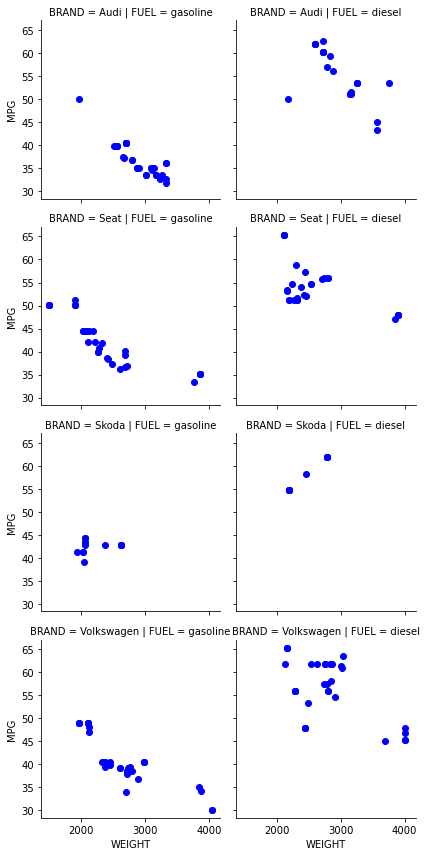

In [37]:
g = sns.FacetGrid(vw, row='BRAND', col='FUEL')
g.map(plt.scatter, "WEIGHT", "MPG", color='blue')

plt.show()

What is a point in a plot? It is a model-year. 

What do we see? 

* Diesel vehicles tend to get higher mpg
* Within a fuel type, the range of mpg are similar
* Weight and mpg are usually negatively correlated (Skoda diesel?)
* There is heterogeneity in the number of models per brand

### Facet plot syntax
We first create the grid using `FacetGrid()`. We specify which DataFrame we are plotting and which variables we want for the rows and columns. These variables should be *categorical* and should have relatively few potential values. Otherwise, the grid would get very large and it would be hard to interpret. 

```python
g = sns.FacetGrid(vw, row='BRAND', col='FUEL')
```

Next, we map a plot type to the grid using `map()`. We can make many types of plots. In this case we have used the `scatter()` plot from matplotlib. Notice the `plt` that precedes the `scatter`. We can also pass any keyword arguments that `plt.scatter` accepts.    

```python
g.map(plt.scatter, "WEIGHT", "MPG", color='blue')
```

Now lets try a different plot type, `regplot()` from Seaborn. It's easier to see the relationship between weight and mpg. 


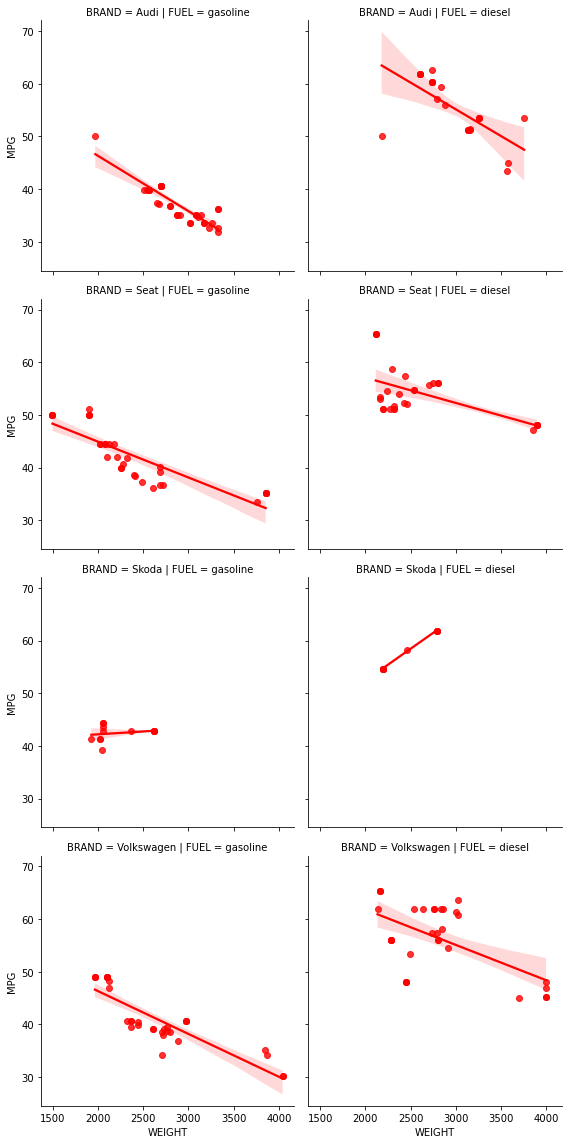

In [38]:
g = sns.FacetGrid(vw, row='BRAND', col='FUEL', height=4)
g.map(sns.regplot, "WEIGHT", "MPG", color='red', ci=90)

plt.show()

**Q: Are more powerful cars more expensive? Does it depend on fuel type? Brand?**

We are not limited to just one type of data in each plot. We can use color to differentiate further. In the next figure we add Ford, PSA, and Fiat to the firms in our DataFrame. Each firm has several brands and each brand has several models.

* Columns are still fuel type
* Rows are now firms (VW, Ford, PSA, Fiat)
* Hue (color) is brand (Ford's Volvo; Fiat's Alfa Romeo, etc.)
```python
g = sns.FacetGrid(to_plot, hue='BRAND', col='FUEL', row='FIRM')
```

In each plot we have 
* Price vs HP
* I'm using a scatter plot

```python
g.map(plt.scatter, "PRICE", "HP")
```

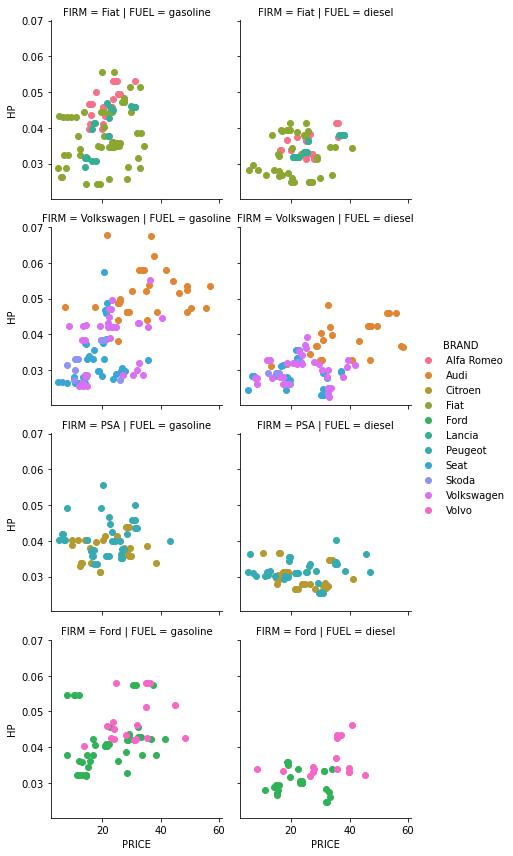

In [39]:
# Create a dataframe with just these firms
firms = ['Ford', 'PSA', 'Volkswagen', 'Fiat']
to_plot = df[df['FIRM'].isin(firms)]

g = sns.FacetGrid(to_plot, hue='BRAND', col='FUEL', row='FIRM')
g.map(plt.scatter, "PRICE", "HP")
g.add_legend()
plt.show()

## Practice: Facet Plots



1. **Q: How is size related to price? Does it differ by firm? By brand? By fuel type?**

Use a facet plot to explore these questions. Restrict the DataFrame to include only Ford, PSA, Volkswagen, and Fiat. 

In [ ]:
# The .isin() saves us from syntax like 
# to_plot = df[(df['FIRM']=='Ford') | (df['FIRM'] == 'PSA') | (df['FIRM']==Volkswagen) | (df['FIRM']=='Fiat')]

firms = ['Ford', 'PSA', 'Volkswagen', 'Fiat']
to_plot = df[df['FIRM'].isin(firms)]

In [ ]:
# Create your plot here

2. Let's explore a related concept, the `pairplot` [[docs](https://seaborn.pydata.org/generated/seaborn.pairplot.html)]. Try

```python
g=sns.pairplot(df, vars=['PRICE', 'HP', 'WEIGHT'])
```

What does `pairplot` do? Why do we only need to look at the upper or lower triangle of the figure? What is on the diagonal?

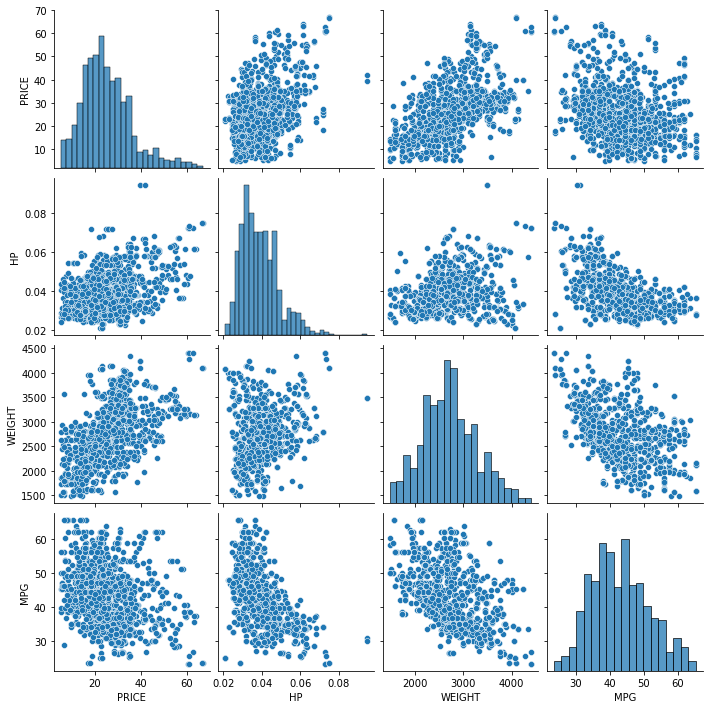

In [40]:
g=sns.pairplot(df, vars=['PRICE', 'HP', 'WEIGHT', 'MPG'])

# pairplot plots scatter plots for each possible pair of variables.
# The figure is symmetric, so any plot in the top triangle is also in 
# bottom triangle, but with the axes reversed. 
# The diagonal is the histogram of the variable. 

3. How do these relationships differ by fuel type? Use the 'hue' option (and the documentation).

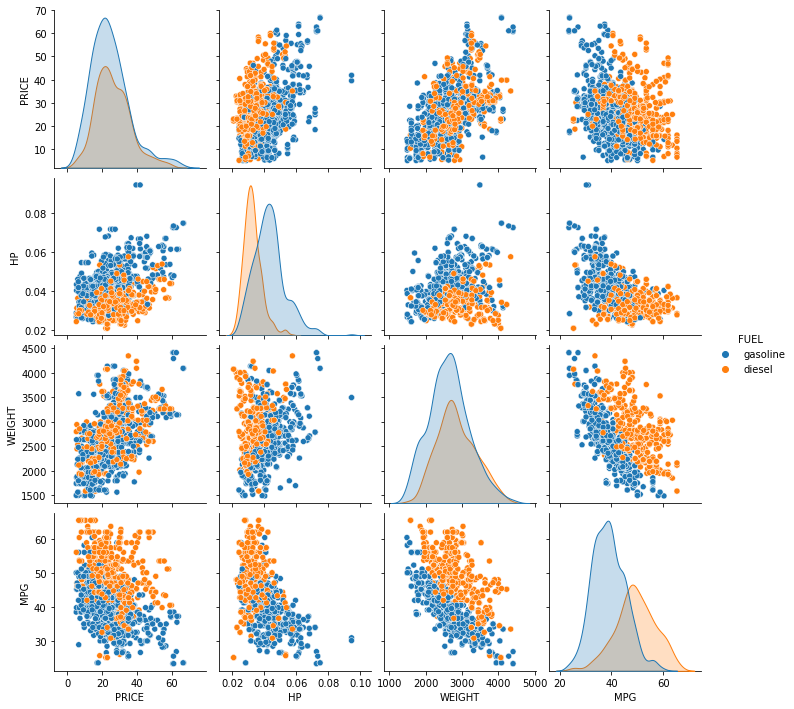

In [41]:
g=sns.pairplot(df, vars=['PRICE', 'HP', 'WEIGHT',  'MPG'], hue='FUEL')

# It is clear that gasoline has a right-shifted HP distribution and a left-shifted MPG distribution. 
# For diesel, HP doesn't look correlated with weight or mpg. For gas HP and MPG look negatively correlated. 
# The weight-mpg correlation looks to have a similar slope and a different intercept by fuel type.